#### IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

###### Load data 

In [2]:
data = pd.read_csv('../Data/Amharic News Dataset.csv')

In [3]:
data.head()

,headline,category,date,views,article,link
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012


### preliminarly wrangling 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51483 entries, 0 to 51482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


In [5]:
data.isna().sum()

headline    13
category     1
date         0
views        0
article      0
link         0
dtype: int64

In [6]:
data.shape

(51483, 6)

In [7]:
data.nunique()

headline    50095
category        6
date         6189
views        4408
article     50285
link        50778
dtype: int64

### handling null values 

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.isna().sum()

headline    0
category    0
date        0
views       0
article     0
link        0
dtype: int64

In [10]:
data.shape

(51470, 6)

In [20]:
df_combined = data[['category','article']]

In [22]:
df_combined.head()

,category,article
0,ስፖርት,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...
1,መዝናኛ,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...
2,ስፖርት,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...
3,ስፖርት,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...
4,ስፖርት,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...


In [24]:
df_clean = df_combined.copy()     
df_clean.loc[(df_clean['category'] == 'ስፖርት')] = 'Sport'
df_clean.loc[(df_clean['category'] == 'ፖለቲካ')] = 'Politics'
df_clean.loc[(df_clean['category'] == 'ሀገር አቀፍ ዜና')] = 'National News'
df_clean.loc[(df_clean['category'] == 'ዓለም አቀፍ ዜና')] = 'International News'
df_clean.loc[(df_clean['category'] == 'መዝናኛ')] = 'Entertainment'
df_clean.loc[(df_clean['category'] == 'ቢዝነስ')] = 'Business' 

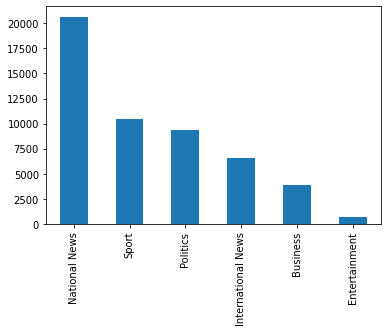

In [29]:
df_clean['category'].value_counts().plot(kind='bar');

In [32]:
df_combined.to_csv('../Data/data_combined.csv',index=False)